## Estudo: Estimando o Preço de Imóveis em São Paulo

# Objetivo

O objetivo deste estudo é elaborar um modelo de regressão múltipla com a biblioteca `statsmodels` para predição de preço de imóveis com base no histórico de preços e características de vários imóveis de São Paulo. 

# Imports

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Preparação dos dados e EDA


In [2]:
# Importação dos dados
imovsp = pd.read_excel('https://github.com/digonfernan/regressao-multipla-imoveis-sp/blob/main/regressao_preco_imoveis.xlsx?raw=true')

In [3]:
# Visualização inicial do dataset
display(imovsp.shape)
display(imovsp.head())
display(imovsp.tail())

(3741, 7)

,bairro,areaM2,suites,dormitorios,banheiros,vagas,preco
0,vila-nova-conceicao,32,1,1,1,1,490000
1,vila-nova-conceicao,157,2,2,2,2,3180000
2,vila-nova-conceicao,205,2,3,3,3,1900000
3,vila-nova-conceicao,193,3,3,3,3,3565000
4,vila-nova-conceicao,116,1,3,2,2,1605000


,bairro,areaM2,suites,dormitorios,banheiros,vagas,preco
3736,vila-mariana,84,1,3,5,2,750000
3737,vila-mariana,164,1,3,5,1,765000
3738,vila-mariana,133,1,3,5,2,1000000
3739,vila-mariana,160,3,3,4,3,1370000
3740,vila-mariana,141,3,3,4,2,1500000


In [4]:
# Verificação da ausência de valores
imovsp.isnull().values.any()

False

In [5]:
# Visualização inicial dos dados
# Contabilização da distribuição por bairro
imovsp.bairro.value_counts()

vila-mariana           1714
paraiso                 802
vila-nova-conceicao     789
vila-sonia              307
morumbi                 129
Name: bairro, dtype: int64

In [6]:
# Visualização da área mínima
imovsp['areaM2'].min()

20

In [7]:
# Visualização da área máxima
imovsp['areaM2'].max()

299

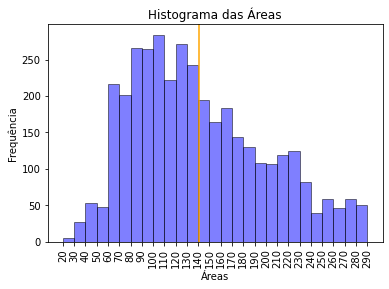

A área média é: 140.34375835338145


In [8]:
# Plot das áreas
# Histograma
media_area = imovsp['areaM2'].mean()

bins = list(range(20, 300, 10))

plt.hist(imovsp['areaM2'], bins=bins, alpha=0.5, color='blue', edgecolor='black')
plt.axvline(x=media_area, color='orange')
plt.title('Histograma das Áreas')
plt.xlabel('Áreas')
plt.ylabel('Frequência')
plt.xticks(bins, rotation=90)
plt.show()

print("A área média é:", imovsp['areaM2'].mean())

In [9]:
# Contabilização da distribuição por número de suítes
imovsp.suites.value_counts()

1    2306
3     654
2     516
4     263
5       1
6       1
Name: suites, dtype: int64

In [10]:
# Contabilização da distribuição por número de banheiros
imovsp.banheiros.value_counts()

2    1100
3    1054
4     574
5     469
1     347
6     161
7      30
9       6
Name: banheiros, dtype: int64

In [11]:
# Contabilização da distribuição por número de vagas
imovsp.vagas.value_counts()

2    1483
1     970
3     815
4     421
5      52
Name: vagas, dtype: int64

In [12]:
# Visualização do preço mínimo
imovsp['preco'].min()

280000

In [13]:
# Visualização do preço máximo
imovsp['preco'].max()

8000000

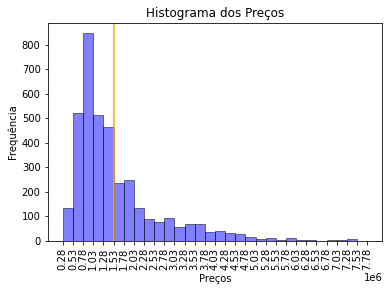

O preço médio é: 1553745.5875434375


In [14]:
# Plot dos preços
# Histograma
media_area = imovsp['preco'].mean()

bins = list(range(280000, 8000000, 250000))

plt.hist(imovsp['preco'], bins=bins, alpha=0.5, color='blue', edgecolor='black')
plt.axvline(x=media_area, color='orange')
plt.title('Histograma dos Preços')
plt.xlabel('Preços')
plt.ylabel('Frequência')
plt.xticks(bins, rotation=90)
plt.show()

print("O preço médio é:", imovsp['preco'].mean())

# Construção do modelo

In [15]:
# Import para modelo
from statsmodels.formula.api import ols
import statsmodels.formula.api as sm 

In [16]:
# Criação do modelo
model_1 = sm.ols(formula = 'preco ~ bairro + areaM2 + suites + dormitorios + banheiros + vagas', data = imovsp, subset = None, drop_cols = None)

In [17]:
# Estimar os parâmetros do modelo especificado
result_1 = model_1.fit()

In [18]:
# Verificação da correlação dos dados
print(result_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  preco   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1611.
Date:                Tue, 14 Mar 2023   Prob (F-statistic):               0.00
Time:                        18:05:50   Log-Likelihood:                -54290.
No. Observations:                3741   AIC:                         1.086e+05
Df Residuals:                    3731   BIC:                         1.087e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [19]:
# Visualização do coeficiente de determinação ajustado obtido
print(result_1.rsquared_adj)

0.7948154407290992


In [20]:
# Re-estimando o modelo a partir da exclusão do atributo menos significativo (conforme visto no summary, é o 'banheiro')
model_2 = sm.ols(formula = 'preco ~ bairro + areaM2 + suites + dormitorios + vagas', data = imovsp, subset = None, drop_cols = None)

In [21]:
# Estimar os parâmetros do modelo especificado
result_2 = model_2.fit()

In [22]:
# Verificação da correlação dos dados
print(result_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  preco   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1812.
Date:                Tue, 14 Mar 2023   Prob (F-statistic):               0.00
Time:                        18:05:50   Log-Likelihood:                -54290.
No. Observations:                3741   AIC:                         1.086e+05
Df Residuals:                    3732   BIC:                         1.087e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [23]:
# Visualização do coeficiente de determinação ajustado obtido
print(result_2.rsquared_adj)

0.7948526838722687


# Predição

In [24]:
# Teste para estimar um imóvel na Vila Mariana, com 134 m2, 1 suite, 4 dorm, 3 banheiros e 3 vagas
imov1 = pd.DataFrame({'bairro': ['vila-mariana'], 
                      'areaM2': [134], 
                      'suites': [1], 
                      'dormitorios': [4], 
                      'banheiros': [3], 
                      'vagas': [3]})

# Print do valor
#Transforma em valor inteiro ao invés de notação cietífica
int_result1 = int(result_2.predict(imov1))
# Print
print("O valor do imóvel é: R$", int_result1)

O valor do imóvel é: R$ 1350584
